# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [29]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib as plt
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [30]:
#Code Used:
north_df.head(30)
# north_df['Rep ID'].nunique()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


According to the code, there are 9 unique reps in the North branch.

#### EDA Question 1B:  How many reps are in the South branch?  

In [31]:
#Code Used:
south_df.head()
# south_df['Rep ID'].nunique()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


According to the code, there are 11 unique reps in the South branch.

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [32]:
#Code Used:
north_df.mean(skipna=True, numeric_only=True)

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [33]:
#Code Used:
south_df.mean(skipna=True, numeric_only=True)

Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [34]:
# Code Used:
ns_df = pd.concat([north_df, south_df])
ns_df.head()
#north_df.groupby('Time Block').value_counts()
ns_df['Time Block'].value_counts()

12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9

- 1b) Reps in the South Branch = 11

- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99 minutes 
> - Not Ready Minutes = 1.91 minutes
> - Incoming Wait Time =  3.05 minutes
> - During Call Wait Time = 2.97 minutes
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 minutes
> - Not Ready Minutes = 1.91 minutes
> - Incoming Wait Time = 3.00 minutes
> - During Call Wait Time = 3.08 minutes
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: The only column with 'null' entries is 'Incoming Wait Time,' but the minimum for this value is 1.0s, which indicates that the data is either unavailable or the client had no viable wait time to document. However, we are unable to tell the difference between lost data and negligible wait time, so can't treat NaN values as if they mean "no wait." 

In [35]:
# Code Used
# Add Additional Cells as needed.
ns_df.info()
ns_df['Incoming Wait Time'].min() #since this is 1, we know that there aren't any 0 options so NaN doesn't CERTAINLY mean negligible wait


<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     208 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

1.0

In [36]:
# another code cell
num_col = ns_df.select_dtypes(include = ['number']).columns # grouping of numeric data
print(num_col)

ns_df[num_col].info()


Index(['Unnamed: 0', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Lost Call              559 non-null    int64  
 2   Abandoned              559 non-null    int64  
 3   Busy Minutes           559 non-null    int64  
 4   Not Ready Minutes      559 non-null    int64  
 5   Incoming Wait Time     208 non-null    float64
 6   During Call Wait Time  559 non-null    int64  
 7   Calls                  559 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 39.3 KB


In [37]:
# nonnumeric code cell
nonnum_col = ns_df.select_dtypes(exclude = ['number']).columns # grouping of non-numeric data
print(nonnum_col)

ns_df[nonnum_col].info()

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Branch                559 non-null    object
 1   Call Purpose          559 non-null    object
 2   Time Block            559 non-null    object
 3   Incoming or Outgoing  559 non-null    object
 4   Queue                 559 non-null    object
 5   Rep ID                559 non-null    object
 6   Sale                  559 non-null    object
dtypes: object(7)
memory usage: 34.9+ KB


In [38]:
#still more code
percent_na = ns_df.isna().mean() #after imputing averages to NaN values, these would all be 0% nulls
print(percent_na * 100)

Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       62.790698
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: Because the only variance was a "YES " with a trailing whitespace, I replaced whitespaces in my group dataframe with blank/null characters, causing the offending "YES " to join the "YES" herd.

>Should this need to be replaced in the North dataframe specifically, this is easily done with north_df['Sale'] = north_df['Sale'].str.replace(' ','')

<AxesSubplot:>

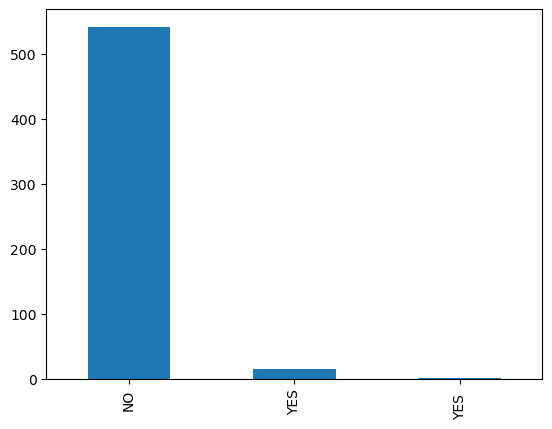

In [39]:
#Code Used
# Add Additional Cells as needed.
ns_df['Sale'].value_counts().plot(kind='bar')

<AxesSubplot:>

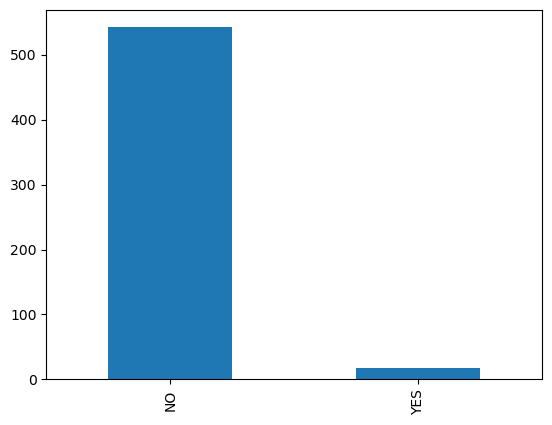

In [40]:
ns_df['Sale'] = ns_df['Sale'].str.replace(' ','')
# north_df['Sale'] = north_df['Sale'].str.replace(' ','') should this need to be changed in the north-specific dataframe as well
ns_df['Sale'].value_counts().plot(kind='bar') #shows that 'YES ' has been replaced

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: To get rid of any duplicates where the only difference was the call identity/index ('Unnamed: 0'), I took a subset of my most recent dataframe marking duplicated rows without this. This led to a table of 5 duplicates, which I then dropped from the collective data set.

In [41]:
#Code Used
# Add Additional Cells as needed.
# investigating duplication

ns_df[ns_df.drop(columns=['Unnamed: 0']).duplicated()]


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1
58,58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [42]:
ns_df_undup = ns_df.drop(columns=['Unnamed: 0']).drop_duplicates()
ns_df_undup.head()

print(ns_df.shape)
print(ns_df_undup.shape)
# 5 duplicate rows were dropped

(559, 15)
(554, 14)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The data 'Calls' isn't illustrative, as the unit of each is 1. Since we can likely assume each instance in the dataframe is an independent call, I dropped this column entirely. ETA: the discovery that I was extremely wrong, and ultimately restored this so I didn't have to come up with a brilliant workaround for the sum of calls for data viz.

In [43]:
#Code Used
# Add Additional Cells as needed.
ns_df_undup['Calls'].nunique()
# since there is only ONE unique value of 'Calls' (it's 1), we can drop the column
ns_df_skinny = ns_df_undup.drop(columns=['Calls'])
ns_df_skinny.tail(1) # TEST: check that Calls was dropped

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [44]:
# Create dataframe for the entire company named df
# Oops, so I already did this. Updating my cleanest dataframe to 'df' below.

df = ns_df_undup
dfn = df[df['Branch'] == 'North']
dfs = df[df['Branch'] == 'South']

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls total
- South Branch = Eric, 35 calls total


In [45]:
# Code Used
# Add Additional Cells as needed.
df.groupby(['Branch','Rep ID']).size().sort_values(ascending=False)

Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     32
        Helga     31
        Sandy     31
North   Lilly     30
        Duke      29
        Todd      29
South   George    29
        Kate      28
        Karl      28
        Josh      26
        Susan     26
North   Joe       25
South   Sharon    25
North   Xander    24
        Cam       24
        Andy      23
        Amanda    22
South   Alice     20
dtype: int64

In [46]:
df.groupby(['Branch','Rep ID']).sum(numeric_only=True)

Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
North  Amanda          0          1           218                 41   
       Andy            0          3           228                 43   
       Brent           0          1           362                 71   
       Cam             1          0           233                 46   
       Duke            2          0           292                 56   
       Joe             0          0           246                 48   
       Lilly           0          2           307                 59   
       Todd            1          0           296                 58   
       Xander          1          0           244                 44   
South  Alice           0          0           199                 46   
       Eric            0          0           361                 54   
       George          0          0           298                 53   
       Helga           0          2           292                 58   
       Josh            3          0           260                 50   
       Karl            1          0           287                 61   
       Kate            0          0           283                 60   
       Randy           3          1           312                 63   
       Sandy           1          0           317                 59   
       Sharon          1          1           257                 38   
       Susan           2          0           267                 53   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Amanda                12.0                     58     22  
       Andy                  36.0                     65     23  
       Brent                 17.0                    117     37  
       Cam                   32.0                     66     24  
       Duke                  39.0                     85     29  
       Joe                   32.0                     78     25  
       Lilly                 37.0                     88     30  
       Todd                  21.0                     97     29  
       Xander                20.0                     68     24  
South  Alice                 15.0                     58     20  
       Eric                  47.0                    112     35  
       George                41.0                     87     29  
       Helga                 36.0                     95     31  
       Josh                  31.0                     83     26  
       Karl                  26.0                     85     28  
       Kate                  34.0                     80     28  
       Randy                 47.0                     96     32  
       Sandy                 34.0                     96     31  
       Sharon                29.0                     77     25  
       Susan                 35.0                     88     26

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.88%
- South Branch = 1.29%
- Company Wide = 1.99%
- Do any of these fall out of the optimal range of 2-5%?
Both the South Branch (1.29%) and Company Wide (1.99%) values are just barely beneath the optimal range, suggesting the South Branch might be overstaffed at the moment.

In [47]:
# Code Used
# Add Additional Cells as needed.
a_rate = df['Abandoned'].mean() * 100
print(a_rate, '% Company-Wide')
a_rateN = dfn['Abandoned'].mean() * 100
print(a_rateN, '% North Branch')
a_rateS = dfs['Abandoned'].mean() * 100
print(a_rateS, '% South Branch')

1.9855595667870036 % Company-Wide
2.880658436213992 % North Branch
1.2861736334405145 % South Branch


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 calls of 243, or 13.58%
- South Branch = 48 calls of 311 or 15.43%
- Company Wide = 81 calls of 554 or 14.62%

In [48]:
# Code Used
# Add Additional Cells as needed.
two_secN = len(dfn[dfn['Incoming Wait Time'] <= 2.0])
two_secS = len(dfs[dfs['Incoming Wait Time'] <= 2.0])
two_secC = len(df[df['Incoming Wait Time'] <= 2.0])
# TEST: print(two_secN, two_secS, two_secC) 
perN = (two_secN * 100) / (dfn['Incoming Wait Time'].count())
perS = (two_secS * 100) / (dfs['Incoming Wait Time'].count())
perC = (two_secC * 100) / (df['Incoming Wait Time'].count())
print(two_secN, "calls of", (dfn['Incoming Wait Time'].count()), 'or', perN, '%')
print(two_secS, "calls of", (dfs['Incoming Wait Time'].count()), 'or', perS, '%')
print(two_secC, "calls of", (df['Incoming Wait Time'].count()), 'or', perC, '%')

33 calls of 81 or 40.74074074074074 %
48 calls of 125 or 38.4 %
81 calls of 206 or 39.320388349514566 %


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 
- South Branch in seconds = 
- Company Wide in seconds = 


In [49]:
# Code Used 
print(df['Incoming Wait Time'].mean(), "seconds")
print(dfn['Incoming Wait Time'].mean(), "seconds")
print(dfs['Incoming Wait Time'].mean(), "seconds")
df.tail()

3.0145631067961167 seconds
3.037037037037037 seconds
3.0 seconds


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: while pie charts can be discouraged/disliked in the data analysis internets, I did choose a pie chart because it communicates very well that a single queue, Queue A, is responsible for over half of abandoned calls. This suggests there is a critical need for staffing or training for employees on Queue A.

In [50]:
# impute the mean value to NaN values in the Incoming Wait Time column
# nant_df = df.fillna(df['Incoming Wait Time'].mean()) # NaNn't df
# nant_df.tail()

Text(0.5, 1.0, 'Abandoned Calls by Caller Queue')

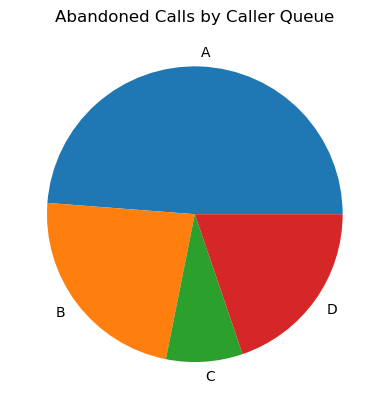

In [51]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt
import seaborn as sns


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
shares = []
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
    shares.append(abandonment_rates[queues[i]])
    

#Your Code Here:

plt.pie(shares, labels=queues)
plt.title('Abandoned Calls by Caller Queue')



#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a stacked bar graph with bar labels depicting the service level percentage for each North Branch rep, because the two layered bars give a visual indicator of how many calls a given rep is taking, plus how many of their calls are taken within the ideal 2-second wait period.

In [52]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = dfn.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
# print(north_plt)
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = dfn[dfn["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = dfn[dfn["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
print(service_level)


        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2        9        22.222222
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333


[Text(0, 0, '60.0'),
 Text(0, 0, '30.0'),
 Text(0, 0, '75.0'),
 Text(0, 0, '45.0'),
 Text(0, 0, '43.0'),
 Text(0, 0, '22.0'),
 Text(0, 0, '33.0'),
 Text(0, 0, '33.0'),
 Text(0, 0, '33.0')]

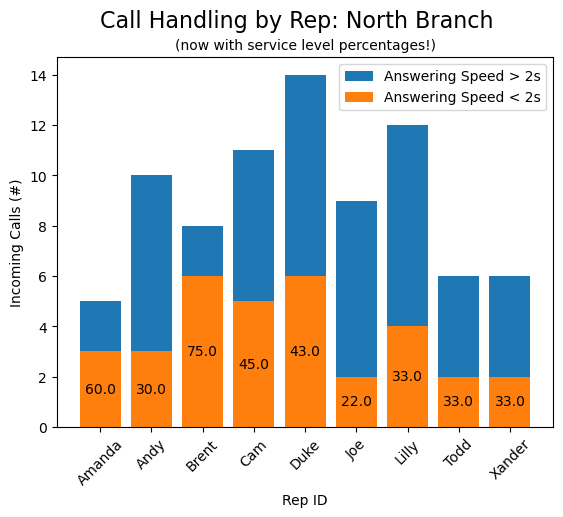

In [53]:
#Your Code Here:
# stacked bar chart with column labels for service level using plt
fig, ax = plt.subplots(sharex='all', sharey='all')
off_target = ax.bar(service_level.index, 
           service_level['Calls_y'], 
           label='Answering Speed > 2s')
on_target = ax.bar(service_level.index,
           service_level['Calls_x'],
           label='Answering Speed < 2s')
fig.suptitle('Call Handling by Rep: North Branch', fontsize=16)
plt.title('(now with service level percentages!)', fontsize=10)
plt.xlabel('Rep ID') # identify the call rep
plt.ylabel('Incoming Calls (#)') # the overall number of incoming calls
plt.xticks(rotation=45)
plt.legend()
ax.bar_label(on_target, labels = service_level['Service Level %'].round(), label_type = 'center')



#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: Because Seaborn can chart dataframes, I selected a category plot in Seaborn and attached the call purpose to the x-axis, the call count to the y-axis, and the hue to the incoming/outgoing distinction. To do this, I had to specify groupby's "as_index" variable was set to false, because otherwise Seaborn throws a "could not interpret input" error for "call purpose." This allows me to group incoming/outgoing calls by purpose so they can be visually compared to one another.

In [120]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose", as_index = False)
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()



      Call Purpose Incoming or Outgoing  count
0        Complaint             Incoming     51
1  Product Support             Outgoing    228
2  Product Support             Incoming     82
3    Sales Support             Outgoing    120
4    Sales Support             Incoming     73


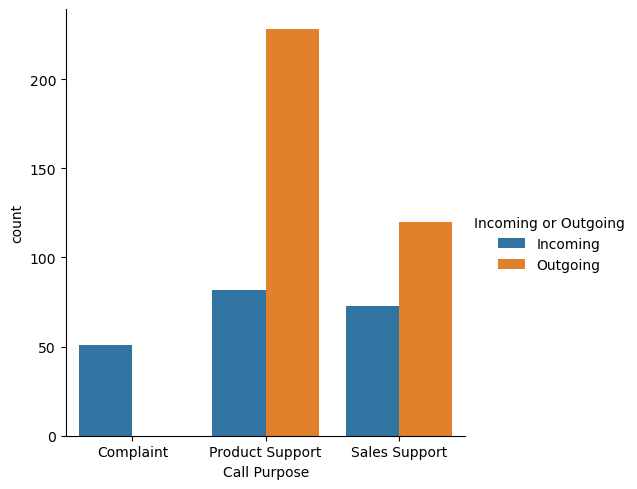

In [125]:
#Your Code Here:
import seaborn as sns

sns.catplot(data = purpose_counts, kind = 'bar', x='Call Purpose', y='count', hue = 'Incoming or Outgoing')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: